#### Step 1.1 Dataset
The dataset we will use is the popular diabetes dataset. Your first task is to create a class to store the dataset and which meets the following guidelines:

create a method that displays basic information about the dataset (info, describe, first few lines, etc.)
create a method that allows receiving a splitted (into training and test data) dataset
create a method that allows to perform basic EDA on the dataset - at least correlation matrix
the results should be reproducible i.e. running the code again should give the same results
data should be properly formatted and prepared for further processing
In the case of EDA, answer the following questions:

Which feature correlates most with the presence of diabetes?
What other correlations can we find in the presented dataset?
What kind of data are in the dataset?
A nice way to create correlation matrices is to use the heatmapz library, see:

Project 1: correlation matrix

#### STEP 1.2 Classifier test function
Create a function that tests the given classifier.

Requirements:

- use stratified cross-validation for model evaluation
- return at least a four basic metrics accuracy, recall, precision, f1
- in addition to the metrics, return a trained model

#### STEP 1.3 Conducting experiments
Congratulations! You have succeeded in creating a relatively universal tool for comparing different models with each other. Now there is nothing left to do but to conduct research and experiments that will give you a better understanding of the available hyperparameters. Below is a sample list of models that you can test:

- Logistic Regression
- kNN
- Decision tree
- Random forest

Test selected hyperparameters of at least 3 classification methods. Although nothing prevents you from testing them all ;)

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
dataset = pd.read_csv('C:/Users/User/ML- datasets/diabetes.csv')


In [56]:
dataset

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,negative
764,2,122,70,27,0,36.8,0.340,27,negative
765,5,121,72,23,112,26.2,0.245,30,negative
766,1,126,60,0,0,30.1,0.349,47,positive


In [57]:
dataset.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [58]:
dataset.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [61]:
dataset['Class']=dataset.Class.map({'negative':0, 'positive':1})

dataset

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [99]:
dataset['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
y = dataset['Class']
X = dataset.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(768, 8) (768,)
(614, 8) (614,)
(154, 8) (154,)


In [103]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

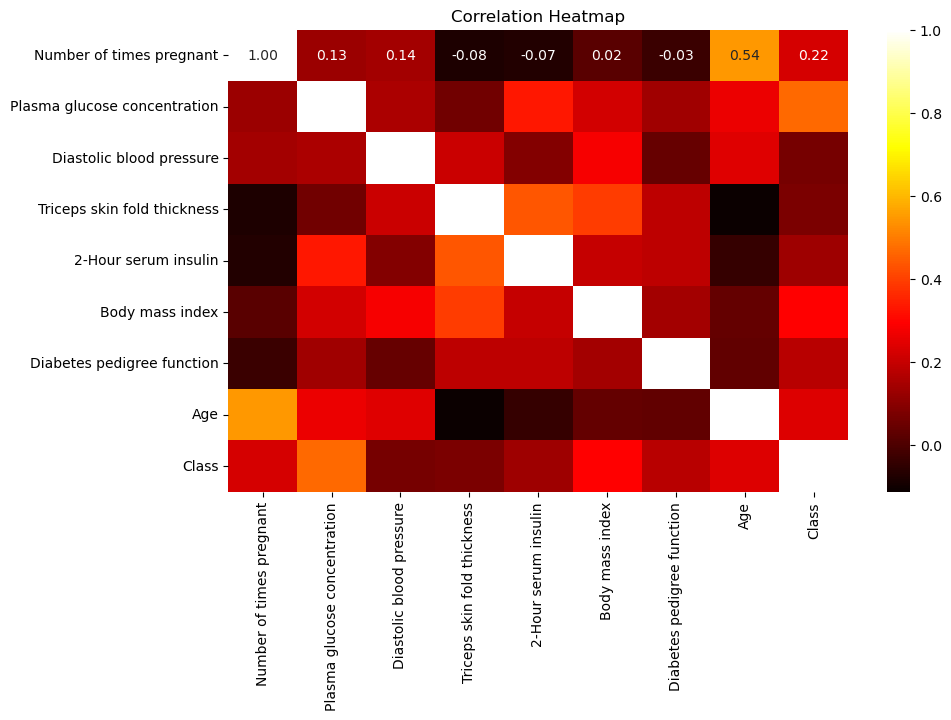

In [104]:
plt.figure(figsize=(10,6))
correlation = dataset.corr()
sn.heatmap(correlation, annot = True, cmap='hot', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [110]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [111]:
def evaluate_classifier(model, X, y, cv_folds=5):
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

In [112]:
model = model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_test, y_test)
y_pred_test = model.predict(X_test)

In [113]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)



In [122]:
print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-score: {f1_score_test}')

Accuracy: 0.8246753246753247
Precision: 0.78
Recall: 0.7090909090909091
F1-score: 0.7428571428571429


In [125]:
lr = LogisticRegression()

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
}
    
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5)

grid_lr.fit(X_train, y_train)

print("\nBest parameters for Logistic Regression:", grid_lr.best_params_)
print("Best score for Logistic Regression:", grid_lr.best_score_)

y_pred_lr = grid_lr.predict(X_test)

print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))



C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta


Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.7703851792616286

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kw

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Define the classifiers and their hyperparameter grids

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_tree = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

In [119]:
# Initialize the classifiers
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Set up GridSearchCV for each classifier
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)

In [128]:
# Fit the models
grid_knn.fit(X_train, y_train)
grid_tree.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

# Print the best parameters and best score for each classifier
print("Best parameters for kNN:", grid_knn.best_params_)
print("Best score for kNN:", grid_knn.best_score_)

print("\nBest parameters for Decision Tree:", grid_tree.best_params_)
print("Best score for Decision Tree:", grid_tree.best_score_)

print("\nBest parameters for Random Forest:", grid_rf.best_params_)
print("Best score for Random Forest:", grid_rf.best_score_)

Best parameters for kNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best score for kNN: 0.7476076236172198

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best score for Decision Tree: 0.7475276556044248

Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best score for Random Forest: 0.7882447021191524


In [129]:
y_pred_knn = grid_knn.predict(X_test)
y_pred_tree = grid_tree.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)

# Print classification reports for each model
print("\nClassification Report for kNN:\n", classification_report(y_test, y_pred_knn))
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_tree))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Classification Report for kNN:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77        99
           1       0.59      0.60      0.59        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro 

In [130]:
def calculate_metrics(y_true, y_pred):
    return [accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)]

In [131]:
metrics_logistics = calculate_metrics(y_test, y_pred_lr)
metrics_neighbors = calculate_metrics(y_test, y_pred_knn)
metrics_tree = calculate_metrics(y_test, y_pred_tree)
metrics_forest = calculate_metrics(y_test, y_pred_rf)

df = pd.DataFrame({
    'Logistic Regression': metrics_logistics,
    'KNN': metrics_neighbors,
    'Decision Tree': metrics_tree,
    'Random Forest': metrics_forest,
}, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

df

,Logistic Regression,KNN,Decision Tree,Random Forest
Accuracy,0.746753,0.707792,0.792208,0.727273
Precision,0.637931,0.589286,0.744681,0.614035
Recall,0.672727,0.600000,0.636364,0.636364
F1-score,0.654867,0.594595,0.686275,0.625000


#### Conclusion

Best Overall Model: The Decision Tree appears to be the best classification model for the diabetes dataset based on the combination of accuracy, precision, recall, and F1-score. It has the highest accuracy and precision and performs reasonably well in terms of recall. While its recall is not the highest, it is still competitive, and its higher precision and F1-score outweigh the slightly lower recall.